In [1]:
!ls /data/12306/images/

models	卷尺	拖把	毛线	牌坊	红豆	茶盅  订书机  锅铲
中国结	双面胶	挂钟	沙包	狮子	红酒	药片  话梅    锣
仪表盘	口哨	排风机	沙拉	珊瑚	绿豆	菠萝  调色板  锦旗
公交卡	啤酒	文具盒	海报	电子秤	网球拍	蒸笼  跑步机  雨靴
冰箱	安全帽	日历	海苔	电线	老虎	薯条  路灯    鞭炮
创可贴	开瓶器	本子	海鸥	电饭煲	耳塞	蚂蚁  辣椒酱  风铃
刺绣	手掌印	档案袋	漏斗	盘子	航母	蜜蜂  金字塔  高压锅
剪纸	打字机	棉棒	烛台	篮球	苍蝇拍	蜡烛  钟表    黑板
印章	护腕	樱桃	热水袋	红枣	茶几	蜥蜴  铃铛    龙舟


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [4]:
bs = 64

In [5]:
path = Path('/data/12306/images/')

In [6]:
path.ls()

[PosixPath('/data/12306/images/手掌印'),
 PosixPath('/data/12306/images/排风机'),
 PosixPath('/data/12306/images/路灯'),
 PosixPath('/data/12306/images/公交卡'),
 PosixPath('/data/12306/images/锅铲'),
 PosixPath('/data/12306/images/牌坊'),
 PosixPath('/data/12306/images/高压锅'),
 PosixPath('/data/12306/images/海鸥'),
 PosixPath('/data/12306/images/护腕'),
 PosixPath('/data/12306/images/蚂蚁'),
 PosixPath('/data/12306/images/拖把'),
 PosixPath('/data/12306/images/本子'),
 PosixPath('/data/12306/images/中国结'),
 PosixPath('/data/12306/images/仪表盘'),
 PosixPath('/data/12306/images/话梅'),
 PosixPath('/data/12306/images/电饭煲'),
 PosixPath('/data/12306/images/电线'),
 PosixPath('/data/12306/images/剪纸'),
 PosixPath('/data/12306/images/双面胶'),
 PosixPath('/data/12306/images/创可贴'),
 PosixPath('/data/12306/images/卷尺'),
 PosixPath('/data/12306/images/菠萝'),
 PosixPath('/data/12306/images/老虎'),
 PosixPath('/data/12306/images/黑板'),
 PosixPath('/data/12306/images/辣椒酱'),
 PosixPath('/data/12306/images/热水袋'),
 PosixPath('/data/12306/ima

In [7]:
data = ImageDataBunch.from_folder(path,
                                  valid_pct=0.3,
                                  ds_tfms=get_transforms()).normalize(imagenet_stats)

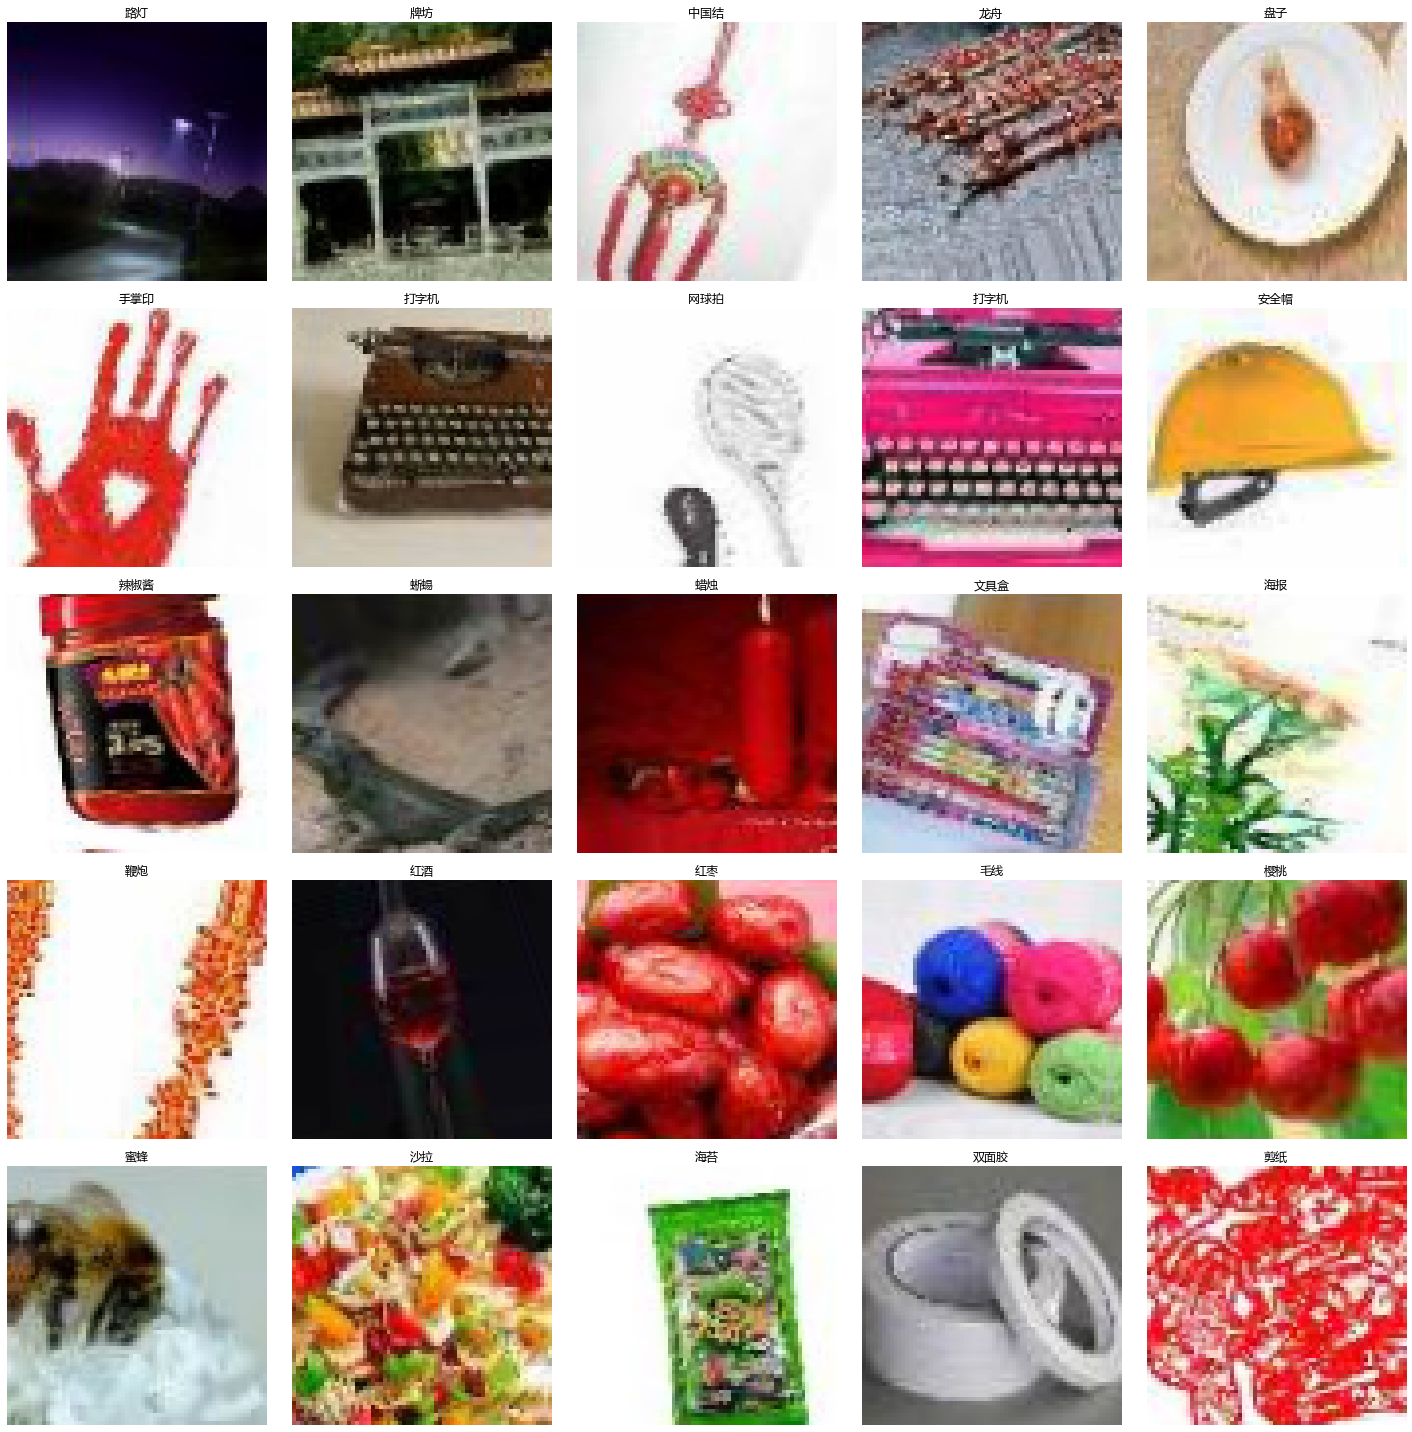

In [8]:
data.show_batch(rows=5)

In [9]:
data.classes, data.c

(['中国结',
  '仪表盘',
  '公交卡',
  '冰箱',
  '创可贴',
  '刺绣',
  '剪纸',
  '印章',
  '卷尺',
  '双面胶',
  '口哨',
  '啤酒',
  '安全帽',
  '开瓶器',
  '手掌印',
  '打字机',
  '护腕',
  '拖把',
  '挂钟',
  '排风机',
  '文具盒',
  '日历',
  '本子',
  '档案袋',
  '棉棒',
  '樱桃',
  '毛线',
  '沙包',
  '沙拉',
  '海报',
  '海苔',
  '海鸥',
  '漏斗',
  '烛台',
  '热水袋',
  '牌坊',
  '狮子',
  '珊瑚',
  '电子秤',
  '电线',
  '电饭煲',
  '盘子',
  '篮球',
  '红枣',
  '红豆',
  '红酒',
  '绿豆',
  '网球拍',
  '老虎',
  '耳塞',
  '航母',
  '苍蝇拍',
  '茶几',
  '茶盅',
  '药片',
  '菠萝',
  '蒸笼',
  '薯条',
  '蚂蚁',
  '蜜蜂',
  '蜡烛',
  '蜥蜴',
  '订书机',
  '话梅',
  '调色板',
  '跑步机',
  '路灯',
  '辣椒酱',
  '金字塔',
  '钟表',
  '铃铛',
  '锅铲',
  '锣',
  '锦旗',
  '雨靴',
  '鞭炮',
  '风铃',
  '高压锅',
  '黑板',
  '龙舟'],
 80)

In [10]:
learn = cnn_learner(data, models.resnet34,
                    metrics=[error_rate, accuracy])

In [25]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.567535,0.434751,0.117298,0.882702,00:10
1,0.701375,0.839341,0.203505,0.796495,00:10
2,0.821682,0.764026,0.187677,0.812323,00:10
3,0.656707,0.820278,0.183437,0.816563,00:10
4,0.472118,0.549461,0.130017,0.869983,00:10
5,0.309605,0.543121,0.127756,0.872244,00:10
6,0.215724,0.358338,0.081119,0.918881,00:10
7,0.105847,0.251460,0.061899,0.938101,00:10
8,0.053747,0.242085,0.057377,0.942623,00:10
9,0.037688,0.244204,0.056529,0.943471,00:10


In [26]:
learn.save('stage-1')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

In [28]:
len(data.valid_ds) == len(losses) == len(idxs)

True

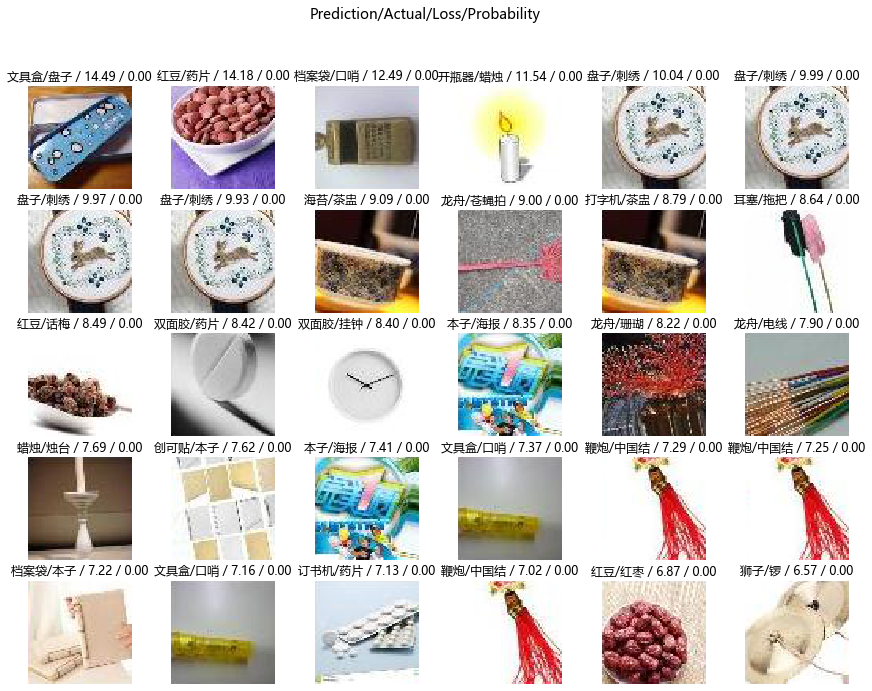

In [29]:
interp.plot_top_losses(30, figsize=(15, 11))

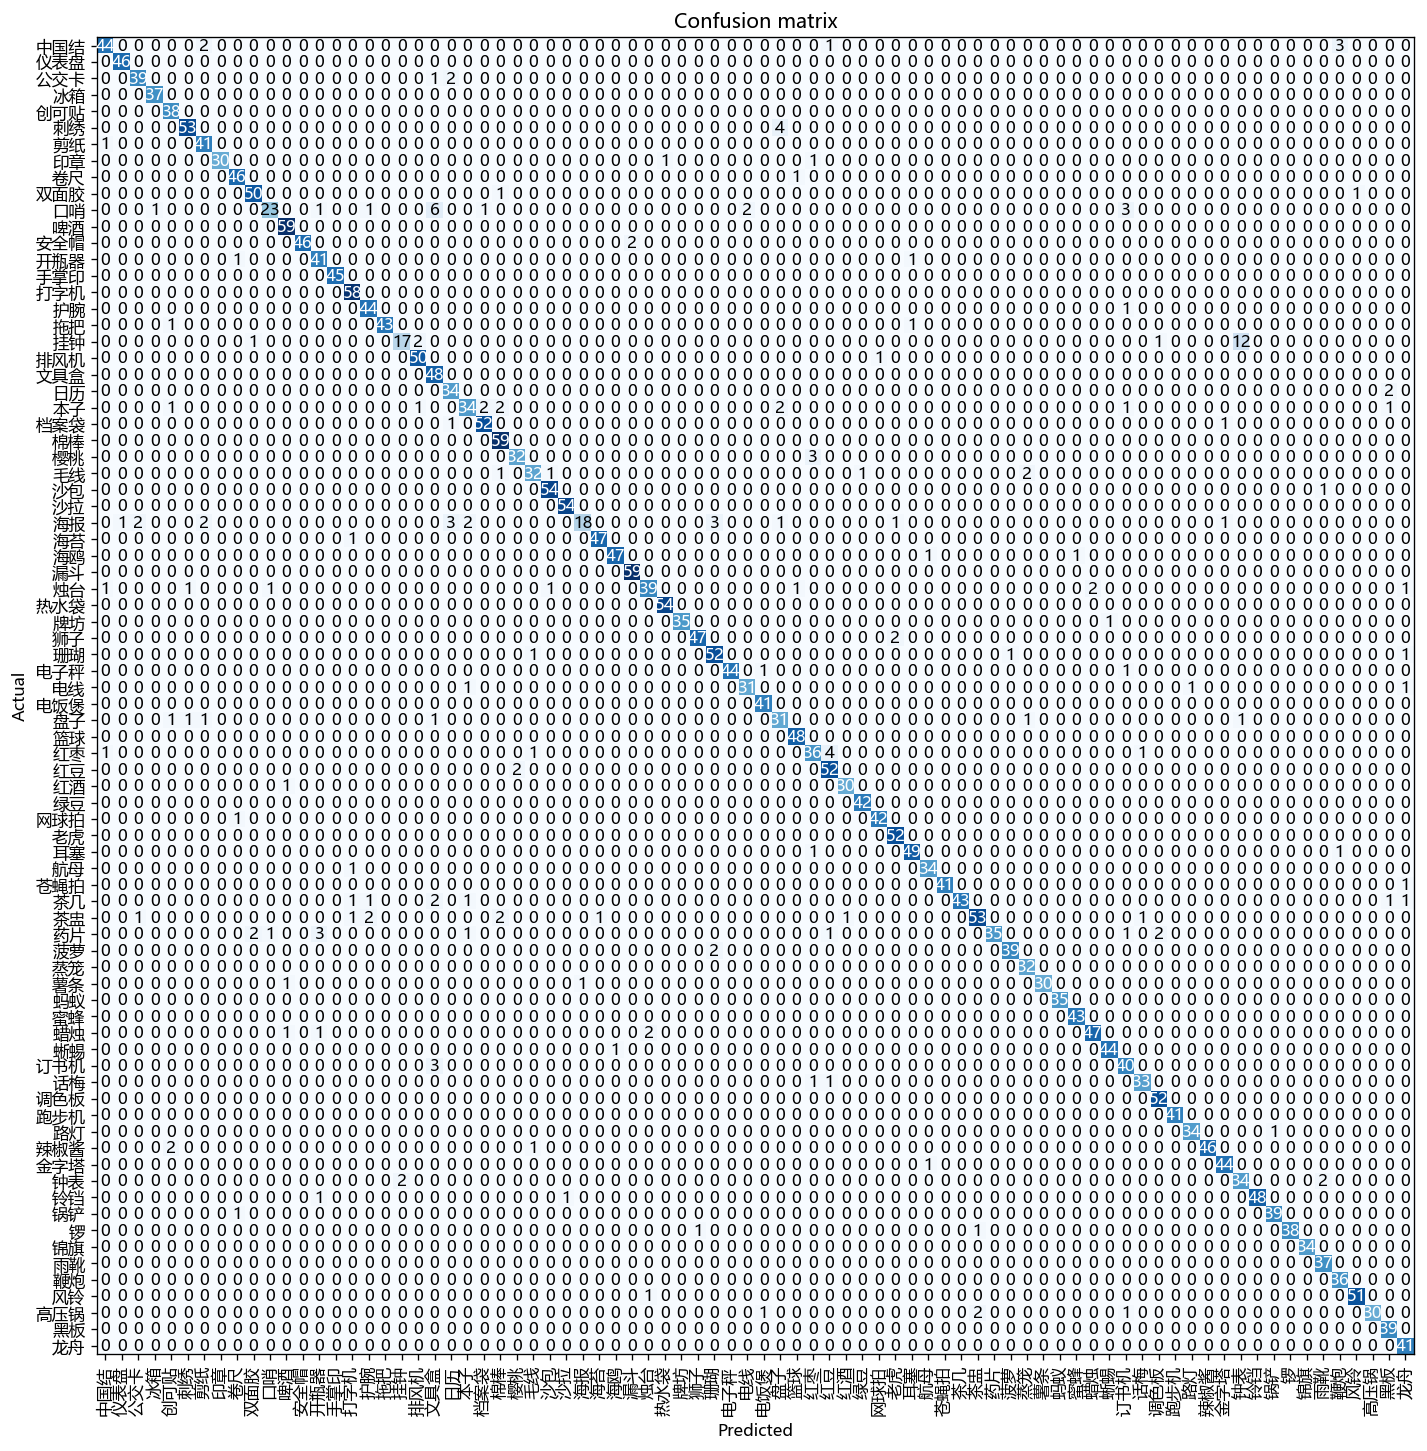

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

In [31]:
interp.most_confused(min_val=5)

[('挂钟', '钟表', 12), ('口哨', '文具盒', 6)]

In [32]:
learn.unfreeze()

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


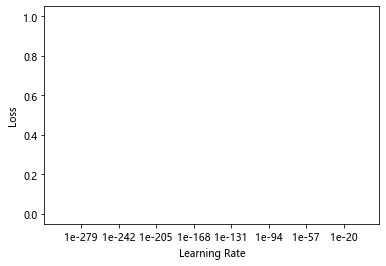

In [34]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.052142,0.249000,0.064443,0.935557,00:10
1,0.059370,0.267772,0.066139,0.933861,00:10
2,0.065356,0.325024,0.073770,0.926230,00:10
3,0.071815,0.316474,0.071792,0.928208,00:10
4,0.058506,0.300675,0.069531,0.930469,00:10
5,0.048831,0.301693,0.066704,0.933296,00:10
6,0.027521,0.265647,0.059356,0.940644,00:10
7,0.017804,0.268576,0.059921,0.940079,00:10
8,0.013426,0.270401,0.061334,0.938666,00:10
9,0.014338,0.261902,0.058508,0.941492,00:10


In [26]:
learn.save('stage-2')

In [24]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (8256 items)
x: ImageList
Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66)
y: CategoryList
手掌印,手掌印,手掌印,手掌印,手掌印
Path: /data/12306/images;

Valid: LabelList (3538 items)
x: ImageList
Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66),Image (3, 66, 66)
y: CategoryList
红豆,蒸笼,蜥蜴,烛台,电子秤
Path: /data/12306/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [18]:
import cv2

img = cv2.imread('/data/12306/pure_img/dual_vocab/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [82]:
from utils import get_all_images

s1, s2, s3, s4, s5, s6, s7, s8 = get_all_images(img)

In [83]:
learn.predict(Image(s1))[0]

Category 路灯